# Lab 7.1: Introduction to Time Series 

## Exploring Monthly Birth Data   

The number of live births (in hundreds of thousands) per month in the U.S. was 
collected for the past 31 years (https://s3-us-west-2.amazonaws.com/dsci/6002/data/birth.txt) starting in January 1980 and ending
December, 2010. We will be exploring this time series using various methods and predict
the birth counts for 2011.

1) Load the data into a pandas dataframe.

In [1]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
birth = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/birth.txt')
birth.head()

,num_births
0,295
1,286
2,300
3,278
4,272


In [17]:
len(birth)

372

2) Using `pandas.date_range()` to create a `dates` variable 
   (from January 1980 and ending December, 2010).

In [11]:
birth['dates'] = pd.date_range('1/1/1980','12/31/2010', freq='M')
birth.head()

,num_births,dates
0,295,1980-01-31
1,286,1980-02-29
2,300,1980-03-31
3,278,1980-04-30
4,272,1980-05-31


3) Create a `time` variable (range: 1-372) to be used later in the regressions 
and both a `month` and `year` variable (use `pd.DatetimeIndex` to strip these 
values from your dates). 

In [16]:
# Last item of the range needs to be 372 + 1 to have 372 included.
birth['time'] = range(1,373)
birth.head()

,num_births,dates,time
0,295,1980-01-31,1
1,286,1980-02-29,2
2,300,1980-03-31,3
3,278,1980-04-30,4
4,272,1980-05-31,5


In [19]:
birth['month'] = pd.DatetimeIndex(birth['dates']).month
birth.head()

,num_births,dates,time,month
0,295,1980-01-31,1,1
1,286,1980-02-29,2,2
2,300,1980-03-31,3,3
3,278,1980-04-30,4,4
4,272,1980-05-31,5,5


In [20]:
birth['year'] = pd.DatetimeIndex(birth['dates']).year
birth.head()

,num_births,dates,time,month,year
0,295,1980-01-31,1,1,1980
1,286,1980-02-29,2,2,1980
2,300,1980-03-31,3,3,1980
3,278,1980-04-30,4,4,1980
4,272,1980-05-31,5,5,1980


4) Set the `dates` variable as the index of your dataframe.

In [21]:
birth = birth.set_index(birth['dates'])
birth.head()

,num_births,dates,time,month,year
dates,,,,,
1980-01-31,295,1980-01-31,1,1,1980
1980-02-29,286,1980-02-29,2,2,1980
1980-03-31,300,1980-03-31,3,3,1980
1980-04-30,278,1980-04-30,4,4,1980
1980-05-31,272,1980-05-31,5,5,1980


5) Calculate some aggregated statistics by month and year. What months have 
the highest birthrates? Any intuition as to why?

In [48]:
birth.groupby('month')['num_births'].sum()

month
1      9493
2      8942
3      9577
4      9008
5      9315
6      9428
7     10164
8     10359
9     10231
10    10008
11     9475
12     9719
Name: num_births, dtype: int64

The highest birth rates are from July to October.

In [50]:
birth.groupby('month')['num_births'].mean()

month
1     306.225806
2     288.451613
3     308.935484
4     290.580645
5     300.483871
6     304.129032
7     327.870968
8     334.161290
9     330.032258
10    322.838710
11    305.645161
12    313.516129
Name: num_births, dtype: float64

In [51]:
birth.groupby('month')['num_births'].std()

month
1     33.066307
2     28.073521
3     32.922065
4     27.831366
5     29.454904
6     28.582911
7     35.325856
8     36.535003
9     36.582768
10    37.144849
11    31.007040
12    32.352095
Name: num_births, dtype: float64

In [49]:
birth.groupby(['year'])['num_births'].sum()

year
1980    3536
1981    3554
1982    3554
1983    3751
1984    3845
1985    3900
1986    4020
1987    4046
1988    4164
1989    4253
1990    4204
1991    4245
1992    4247
1993    4281
1994    4165
1995    4101
1996    4053
1997    3766
1998    3630
1999    3527
2000    3485
2001    3573
2002    3719
2003    3560
2004    3256
2005    3138
2006    3166
2007    3149
2008    3187
2009    3300
2010    3344
Name: num_births, dtype: int64

In [52]:
birth.groupby(['year'])['num_births'].mean()

year
1980    294.666667
1981    296.166667
1982    296.166667
1983    312.583333
1984    320.416667
1985    325.000000
1986    335.000000
1987    337.166667
1988    347.000000
1989    354.416667
1990    350.333333
1991    353.750000
1992    353.916667
1993    356.750000
1994    347.083333
1995    341.750000
1996    337.750000
1997    313.833333
1998    302.500000
1999    293.916667
2000    290.416667
2001    297.750000
2002    309.916667
2003    296.666667
2004    271.333333
2005    261.500000
2006    263.833333
2007    262.416667
2008    265.583333
2009    275.000000
2010    278.666667
Name: num_births, dtype: float64

In [53]:
birth.groupby(['year'])['num_births'].std()

year
1980    16.532796
1981    17.193198
1982    19.553346
1983    15.447614
1984    19.369415
1985    22.148261
1986    20.710120
1987    19.692330
1988    24.120908
1989    20.384746
1990    18.067215
1991    18.557650
1992    23.070872
1993    18.251401
1994    18.243097
1995    18.030908
1996    12.877923
1997    14.751477
1998    12.011358
1999    15.773732
2000    16.373251
2001    15.656105
2002    17.875622
2003    10.129465
2004     8.783594
2005     9.634219
2006    14.959541
2007    14.266670
2008    15.150508
2009    14.038907
2010    16.361448
Name: num_births, dtype: float64

6) Turn the `num_births` into a time series using `pd.Series()`.

In [32]:
birth['num_births'] = pd.Series(birth['num_births'])

7) Plot the overall data. What are your thoughts about the general pattern 
and or seasonal variation?

![image](images/birthdata.png)

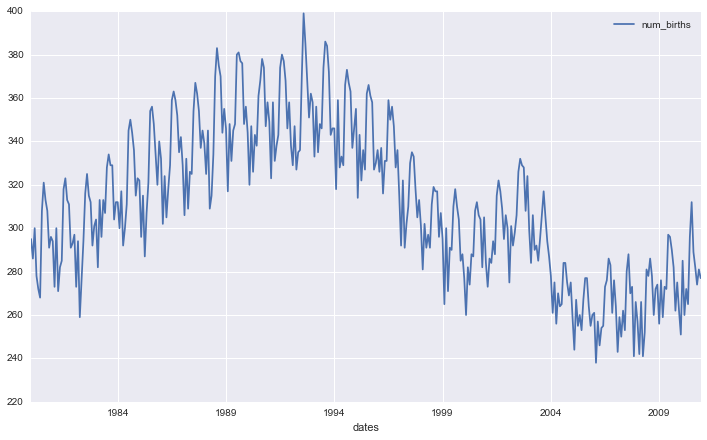

In [61]:
birth.num_births.plot(legend=True, figsize=(12,7));

8) Plot the data for 2006-2010, is the seasonal pattern more apparent? 

In [35]:
birth_season = birth[(birth['year'] >= 2006) & (birth['year'] <= 2010)]
birth_season.head()

,num_births,dates,time,month,year
dates,,,,,
2006-01-31,261,2006-01-31,313,1,2006
2006-02-28,238,2006-02-28,314,2,2006
2006-03-31,257,2006-03-31,315,3,2006
2006-04-30,246,2006-04-30,316,4,2006
2006-05-31,254,2006-05-31,317,5,2006


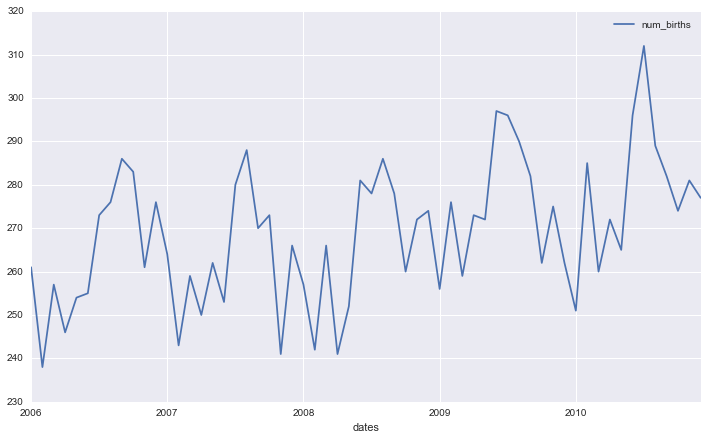

In [62]:
birth_season.num_births.plot(legend=True, figsize=(12,7));

9) Use `df.resample('Q-NOV')` to get quarterly means that follow the seasons of the year (spring, summer, fall, winter). 

In [68]:
# Q-NOV provides exactly what we need by using quarter end of November.
birth.resample('Q-NOV')

//anaconda/lib/python3.5/site-packages/IPython/lib/pretty.py:108: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  return getattr(obj, attr, default)


,num_births,time,month,year
dates,,,,
1980-02-29,290.500000,1.5,1.5,1980.000000
1980-05-31,283.333333,4.0,4.0,1980.000000
1980-08-31,299.000000,7.0,7.0,1980.000000
1980-11-30,304.000000,10.0,10.0,1980.000000
1981-02-28,287.666667,13.0,5.0,1980.666667
1981-05-31,284.333333,16.0,4.0,1981.000000
1981-08-31,308.666667,19.0,7.0,1981.000000
1981-11-30,305.000000,22.0,10.0,1981.000000
1982-02-28,287.666667,25.0,5.0,1981.666667


10) Superimpose the yearly averages and the seasonal averages onto the monthly
data.

![image](images/birthdata_with_averages.png)

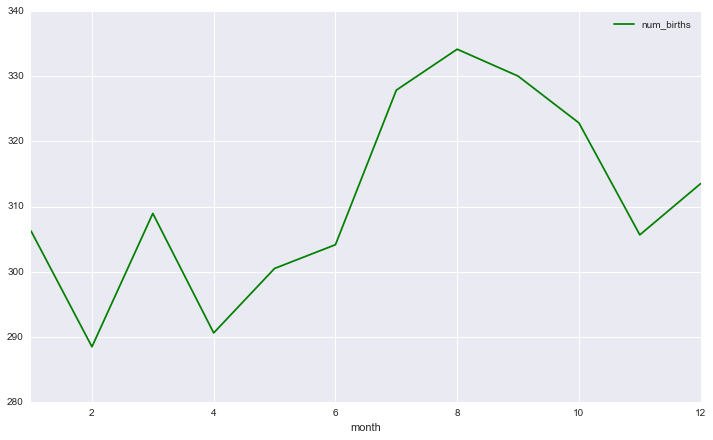

In [66]:
#birth.groupby(['year'])['num_births'].mean().plot(legend=True, figsize=(12,7), color='red')
birth.groupby(['month'])['num_births'].mean().plot(legend=True, figsize=(12,7), color='green');